# Sheet 11 Exercise 32 - Resubmission
**Niklas Markert** - 1611460 / bt709885


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
np.random.seed(0)

## a)

In [2]:
data = pd.read_csv('ex32_data.csv')
data.head

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

In [4]:
y = data.iloc[:, -1]
X = data.iloc[:, :-1]

In [5]:
m = X.shape[0]
test_indices = np.random.choice(m, int(0.25*m), replace=False)
all_indices = np.arange(m)
train_indices = np.setdiff1d(all_indices, test_indices)

In [9]:
train_set_x = X.loc[train_indices].to_numpy().T
train_set_y = y.loc[train_indices].to_numpy().T

In [20]:
test_set_x = X.loc[test_indices].to_numpy().T
test_set_y = y.loc[test_indices].to_numpy().T

## b)


In [11]:
def initialize_parameters(dim):
    w = np.random.randn(dim, 1)
    b = 0.
    return w, b

In [12]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [13]:
def propagate(w, b, X, y):
    m = X.shape[1]

    # Calculate a
    z = np.dot(w.T, X) + b
    a = sigmoid(z)

    cost = - 1/m * np.sum(y * np.log(a) + (1-y) * np.log(1-a))
    if cost == np.NaN:
        cost = np.inf

    # Calculate dw, db
    dw = 1/m * np.dot(X, (a - y).T)
    db = 1/m * np.sum(a - y)

    cost = np.squeeze(cost)

    grads = {'dw': dw,
            'db': db}

    return grads, cost

In [14]:
def optimize(w, b, X, y, num_iter, learning_rate):
    costs = []

    for i in range(num_iter):
        grads, cost = propagate(w, b, X, y)

        w = w - learning_rate * grads['dw']
        b = b - learning_rate * grads['db']

        if i % 10000 == 0:
            costs.append(cost)
            print(np.sum(grads['dw']**2) + np.sum(grads['db']**2))

    params = {'w': w,
             'b': b}

    return params, grads, costs

In [15]:
def predict(w, b, X):
    a = sigmoid(np.dot(w.T, X) + b)
    a[a>=0.5] = 1.
    a[a<0.5] = 0.
    return a

In [16]:
def model(x_train, y_train, x_test, y_test, num_iter, learning_rate):
    n = x_train.shape[0]
    w, b = initialize_parameters(n)
    params, grads, costs = optimize(w, b, x_train, y_train, num_iter, learning_rate)

    y_hat_train = predict(params['w'], params['b'], x_train)
    y_hat_test = predict(params['w'], params['b'], x_test)

    print('training error: ', np.mean(np.abs(y_hat_train - y_train)))
    print('test error: ', np.mean(np.abs(y_hat_test- y_test)))

    return params, costs

## c)

In [17]:
num_iter = 1000001
learning_rate = 0.00025
params, costs = model(train_set_x, train_set_y,
                      test_set_x, test_set_y,
                      num_iter, learning_rate)

<ipython-input-13-b63c18eeb729>:8: RuntimeWarning: divide by zero encountered in log
  cost = - 1/m * np.sum(y * np.log(a) + (1-y) * np.log(1-a))
<ipython-input-13-b63c18eeb729>:8: RuntimeWarning: invalid value encountered in multiply
  cost = - 1/m * np.sum(y * np.log(a) + (1-y) * np.log(1-a))


9636.768935297276
168.96507585053524
131.57929386969266
132.78866177819867
133.25156501706005
132.4231663574184
130.40046616467984
127.28170664306903
123.15782419946422
118.1130347705245
112.22543830631268
105.56753821997405
98.2066960421374
90.20553888018715
81.622335455576
72.51135879873152
62.92326514139466
52.90555615195908
42.503321540513795
31.761002070514664
20.729067857757478
9.513791254342998
0.22217050907509348
0.0007753882260422767
0.0007517165547094576
0.000728927500069058
0.000706981694891951
0.0006858419059654796
0.0006654728891473063
0.0006458412561466288
0.0006269153518145742
0.0006086651412431617
0.0005910621059471897
0.0005740791484021752
0.0005576905042301765
0.0005418716613581567
0.0005265992855150423
0.000511851151479591
0.000497606079539612
0.0004838438766708447
0.0004705452819904753
0.00045769191608429494
0.00044526623384756765
0.0004332514805175182
0.0004216316506096313
0.00041039144950113084
0.0003995162574327289
0.0003889920957247023
0.0003788055950252774
0.00

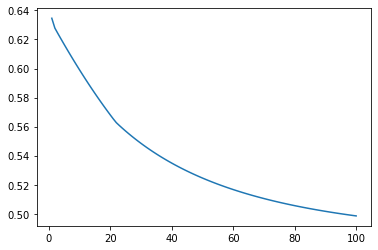

In [19]:
plt.plot(costs)

## d)

In [30]:
pred_test = predict(params['w'], params['b'], test_set_x)

In [32]:
cnf_matrix = metrics.confusion_matrix(np.squeeze(test_set_y), np.squeeze(pred_test))
print(cnf_matrix)

[[119  11]
 [ 26  36]]


## e)

In [22]:
def get_cnf_matrix(learning_rate, steps):
    print('# Train model with learning_rate=' + str(learning_rate) +
          'and steps=' + str(steps) + '-------')
    params, costs = model(train_set_x, train_set_y,
                      test_set_x, test_set_y,
                      steps, learning_rate)
    pred = predict(params['w'], params['b'], test_set_x)
    cnf_matrix = metrics.confusion_matrix(np.squeeze(test_set_y), np.squeeze(pred))
    return cnf_matrix

In [23]:
lrates = [0.00025, 0.0002]
steps = [1000001, 100001, 10001]

for learning_rate in lrates:
    for amount_steps in steps:
        cnfm = get_cnf_matrix(learning_rate, amount_steps)
        print('# Confusion matrix with learning_rate=' + str(learning_rate) +
          ' and steps=' + str(steps) + ' -------')
        print(cnfm)


# Train model with learning_rate=0.00025and steps=1000001-------
9423.843148331283


<ipython-input-13-b63c18eeb729>:8: RuntimeWarning: divide by zero encountered in log
  cost = - 1/m * np.sum(y * np.log(a) + (1-y) * np.log(1-a))
<ipython-input-13-b63c18eeb729>:8: RuntimeWarning: invalid value encountered in multiply
  cost = - 1/m * np.sum(y * np.log(a) + (1-y) * np.log(1-a))


44.26001548760819
56.24597468672193
70.51292721387338
81.91304833466778
90.67472057136426
97.06561368005283
101.32115495329444
103.64995949048101
104.23856810819139
103.2549678864282
100.85125844707882
97.16571327753627
92.32440859477899
86.44254223974266
79.62553178058134
71.96996023225931
63.564430045802375
54.49040075005861
44.823163372065494
34.63343167018305
23.99173259129305
12.99215897160954
2.222923561314991
0.0007803342605515806
0.0007550450780335858
0.0007308552398274757
0.0007077001099713717
0.0006855200068314536
0.000664259656603656
0.0006438678329051144
0.000624297020687491
0.0006055031048904043
0.0005874450835569902
0.0005700848046264566
0.000553386725277467
0.0005373176924830876
0.0005218467433222052
0.0005069449235477946
0.0004925851229201485
0.00047874192585663656
0.000465391476017498
0.00045251135352985725
0.0004400804636432122
0.0004280789357040523
0.0004164880314310642
0.00040529006156379295
0.0003944683100444734
0.0003840069649743284
0.00037389105566123615
0.000364

KeyboardInterrupt: 

Answer:
 - With enough steps both learning rates arrive at the same confusion matrix.
 - Already after 10001 steps we get somewhat usable result (with less false positives for the lower learning rate.)
 - The number of false negatives decreases with more steps.
 - The number of false positives does not develop monotonically.